## Analyzing Fandango's Movie Ratings System

In this project, we'll be looking at Fandango's movie ratings system.

In 2015, Walt Hickey wrote [an article](https://fivethirtyeight.com/features/fandango-movies-ratings/) on Fandango's movie ratings, showing that there was a discrepancy between the ratings that site visitors were shown for each movie and the actual rating as recorded in the HTML code of the page, leading him to accuse Fandango of dishonesty and bias.

The cause of this issue has supposedly been fixed, but in this project, we'll be investigating whether the ratings system has changed at all since Hickey's analysis in 2015.

To do this, we'll be looking at the ratings system's characteristics before and after Hickey's analysis in order to determine whether there has been any change. We'll use the data Hickey collected himself for the "before" dataset, and data collected by Dataquest for the "after" dataset.

In [2]:
import pandas as pd

before = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

In [10]:
print(list(before))
before.loc[0]

['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round', 'Metacritic_norm_round', 'Metacritic_user_norm_round', 'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes', 'Fandango_Difference']


FILM                          Avengers: Age of Ultron (2015)
RottenTomatoes                                            74
RottenTomatoes_User                                       86
Metacritic                                                66
Metacritic_User                                          7.1
IMDB                                                     7.8
Fandango_Stars                                             5
Fandango_Ratingvalue                                     4.5
RT_norm                                                  3.7
RT_user_norm                                             4.3
Metacritic_norm                                          3.3
Metacritic_user_nom                                     3.55
IMDB_norm                                                3.9
RT_norm_round                                            3.5
RT_user_norm_round                                       4.5
Metacritic_norm_round                                    3.5
Metacritic_user_norm_rou

In [9]:
print(list(after))
after.loc[0]

['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango', 'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore', 'nr_imdb', 'nr_tmeter', 'nr_audience']


movie           10 Cloverfield Lane
year                           2016
metascore                        76
imdb                            7.2
tmeter                           90
audience                         79
fandango                        3.5
n_metascore                     3.8
n_imdb                          3.6
n_tmeter                        4.5
n_audience                     3.95
nr_metascore                      4
nr_imdb                         3.5
nr_tmeter                       4.5
nr_audience                       4
Name: 0, dtype: object

We only care about whether the Fandango ratings have changed, so let's store the relevant columns from each dataset so that we can access them more easily.

In [14]:
cut_before = before[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]]
cut_after = after[["movie", "year", "fandango"]]

It should be noted that the data that we have does not constitute the entire population, but is rather only a sample of the movies that Fandango has rated. The "before" dataset has every film with a Rotten Tomatoes rating, a RT user rating, a Metacritic score, a Metacritic User score, an IMDB score, and at least 30 fan reviews on Fandango. The "after" dataset consists of 214 of the most popular movies with a significant number of votes. The sampling is therefore not random, and so not necessarily indicative (likely not) of the population, or how Fandango treats ratings of movies that do not fit the selection criteria of the two datasets.

Now, our original goal was to assess whether Fandango's movie rating system had changed. Looking at Hickey's sample, it's clear that we won't be able to assess whether Fandango's movie rating system has changed in toto, as Hickey did not sample movies that did not meet his criteria.

Furthermore, the sampling criteria for the before and after datasets were not the same. This means our analysis will not evaluate a change in the rating system for such a specific population.

However, the sampling criteria for each dataset is similar enough that we can say that they are both samples of "popular" movies (albeit with popular being defined differently in each case).

Thus, our new goal will be to determine whether Fandango's movie rating system has changed with regards to how it rates popular movies.

### Aside

We could check how closely the after dataset fulfils the popularity criteria of the before dataset by checking how many of the films in the dataset have 30 or more fan reviews. Rather than go through all of the movies in the list, we can get a few sample movies from the dataset and then check those samples. We could do this with the code below

In [16]:
cut_after.sample(10, random_state = 0)

,movie,year,fandango
197,The Take (Bastille Day),2016,4.0
37,Come and Find Me,2016,4.0
89,Kickboxer,2016,4.0
176,The Founder,2016,4.0
170,The Darkness,2016,2.5
75,Ice Age: Collision Course,2016,4.0
96,Lion,2016,4.0
137,Ride Along 2,2016,4.0
5,A Monster Calls,2016,4.0
83,Jane Got a Gun,2016,3.5


Now we can start comparing the datasets. Let's begin by plotting some kernel density plots.

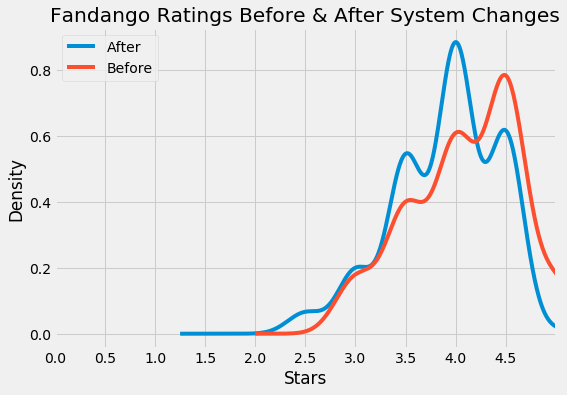

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use("fivethirtyeight")

cut_after["fandango"].plot.kde(label = "After", legend = True, figsize = (8, 5.5))
cut_before["Fandango_Stars"].plot.kde(label = "Before", legend = True)
plt.title("Fandango Ratings Before & After System Changes")
plt.xlabel("Stars")
plt.ylabel("Density")
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5, 0.5))
plt.show()

Now, each of the samples that make up the datasets are quite small, but nonetheless there is a noticeable difference between the two plots. The modal value has reduced from around 4.5 to 4.0, the number of movies with ratings of 4.5 has naturally correspondingly decreased, and the number of movies with ratings of 3.5 has increased.

It therefore seems likely that there has been a change in Fandango's movie rating system between the two datasets, and that the change appears to have resolved some of the issues Hickey outlines in his article.

To confirm this, let's look at some frequency distribution tables. Given that the two datasets have different numbers of movies, we'll look at relative frequencies.

In [26]:
cut_before["Fandango_Stars"].value_counts(normalize = True).sort_index() * 100

3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64

In [25]:
cut_after["fandango"].value_counts(normalize = True).sort_index() * 100

2.5     2.803738
3.0     8.411215
3.5    23.364486
4.0    38.317757
4.5    26.635514
5.0     0.467290
Name: fandango, dtype: float64

There is still a noticeable difference between the before and after ratings.

Before, no films were rated 2.5 stars, and a higher proportion of films were rated 4, 4.5, and 5 stars.

After, some films were rated 2.5 stars, and a lower proprtion of films were rated 4, 4.5, and 5.0 stars. A very small proportion of films were rated 5 stars, in fact, which is more in line with what we'd expect.

As noted above, a higher proportion of films were rated 3.5 stars after than before. However, this is likely due to an overall reduction in rating value rather than an increase of < 3.5 rated films to 3.5, though we can't be sure of this fact from the data we have.

To get a better idea of the datasets overall, let's now find the mean, median, and mode of the two.

In [34]:
mean_before = cut_before["Fandango_Stars"].mean()
median_before = cut_before["Fandango_Stars"].median()
mode_before = cut_before["Fandango_Stars"].mode()[0]

mean_after = cut_after["fandango"].mean()
median_after = cut_after["fandango"].median()
mode_after = cut_after["fandango"].mode()[0]

summary_statistics = pd.DataFrame()
summary_statistics["before"] = [mean_before, median_before, mode_before]
summary_statistics["after"] = [mean_after, median_after, mode_after]
summary_statistics.index = ["mean", "median", "mode"]
summary_statistics

,before,after
mean,4.089041,3.89486
median,4.000000,4.00000
mode,4.500000,4.00000


Our conclusions above are supported by the summary statistics. The mean has decreased, indicating a general decrease in ratings in the after sample.

Let's conclude by visualizing the differences in the summary statistics with a bar graph.

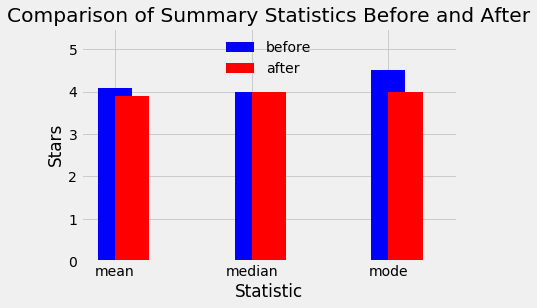

In [45]:
plt.style.use("fivethirtyeight")

summary_statistics["before"].plot.bar(color = "Blue", label = "before", align = "center", width = 0.25)
summary_statistics["after"].plot.bar(color = "Red", label = "after", align = "edge", width = 0.25, rot = 0)

plt.title("Comparison of Summary Statistics Before and After")
plt.ylabel("Stars")
plt.ylim(0, 5.5)
plt.xlabel("Statistic")
plt.legend(framealpha = 0, loc = "upper center")
plt.show()